In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import joblib

### Importing dataset

In [3]:
df = pd.read_csv("C:/Users/moses/OneDrive/Desktop/churn-project/data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
print(df.shape)

(7043, 21)


In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<Axes: xlabel='Churn', ylabel='count'>

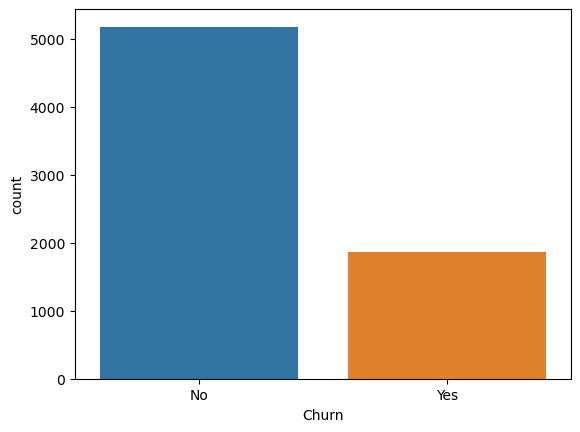

In [8]:
sns.countplot(x='Churn', data=df)

In [9]:
numeric_df = df.select_dtypes(include=['int64','float64'])

<Axes: >

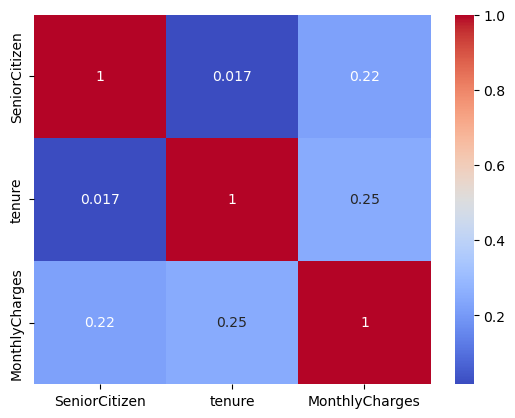

In [10]:
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")

<Axes: xlabel='Contract', ylabel='count'>

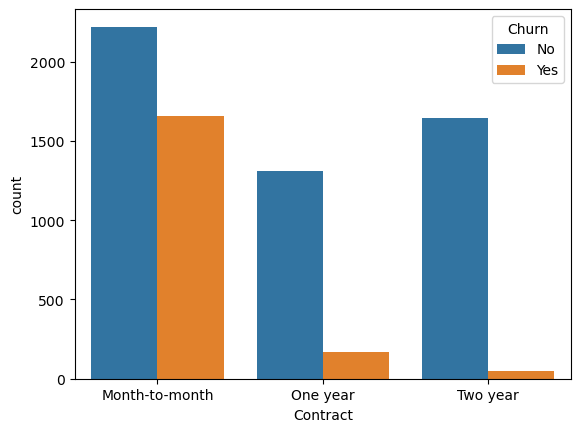

In [11]:
sns.countplot(x='Contract', hue='Churn', data=df)

In [12]:
y = (df['Churn'] == 'Yes').astype(int)
features = df.drop(columns=['customerID','Churn'])

In [13]:
df['TotalCharges'] = df['TotalCharges'].astype(str).str.strip()
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

In [14]:
cat_cols = features.select_dtypes(include='object').columns
X = pd.get_dummies(features, columns=cat_cols, drop_first=True)

In [15]:
X = X.copy()
y = y.copy()

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [17]:
num_cols = X.select_dtypes(include=['int64','float64']).columns
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [18]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

y_pred_lr = log_reg.predict(X_test)

print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1035
           1       0.63      0.54      0.58       374

    accuracy                           0.79      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.79      0.79      1409



Random Forest Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1035
           1       0.66      0.47      0.55       374

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



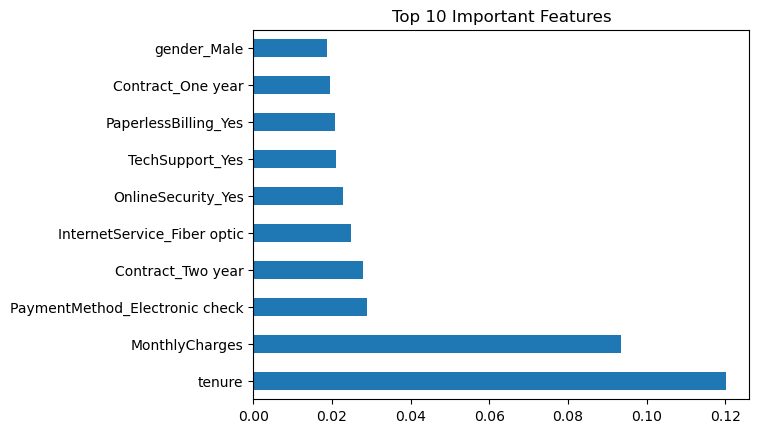

In [19]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Report:")
print(classification_report(y_test, y_pred_rf))

# Feature importance
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).head(10).plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()


In [20]:
print(X.dtypes)


SeniorCitizen            int64
tenure                   int64
MonthlyCharges         float64
gender_Male              uint8
Partner_Yes              uint8
                        ...   
TotalCharges_997.75      uint8
TotalCharges_998.1       uint8
TotalCharges_999.45      uint8
TotalCharges_999.8       uint8
TotalCharges_999.9       uint8
Length: 6559, dtype: object


In [21]:
### Missing values summary

missing = df.isnull().sum()
missing_percent = (missing / len(df) * 100)
missing_summary = pd.concat([missing, missing_percent.rename('percent')], axis=1).sort_values('percent', ascending=False)
display(missing_summary)


,0,percent
customerID,0,0.0
DeviceProtection,0,0.0
TotalCharges,0,0.0
MonthlyCharges,0,0.0
PaymentMethod,0,0.0
PaperlessBilling,0,0.0
Contract,0,0.0
StreamingMovies,0,0.0
StreamingTV,0,0.0
TechSupport,0,0.0


**Missing Values — Summary**

- Shows the number and percentage of missing values per column.
- Decide whether to drop columns, impute missing values, or use other strategies.
- Action items: inspect columns with >0% missing and document chosen treatment.

,counts,churn_rate
Male,3555,0.261603
Female,3488,0.269209


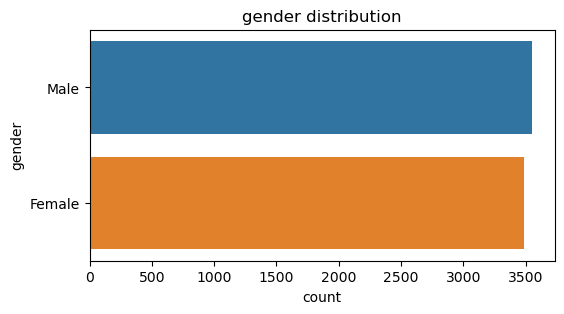

,counts,churn_rate
No,3641,0.329580
Yes,3402,0.196649


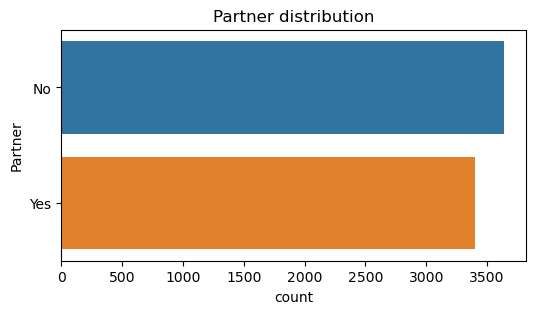

,counts,churn_rate
No,4933,0.312791
Yes,2110,0.154502


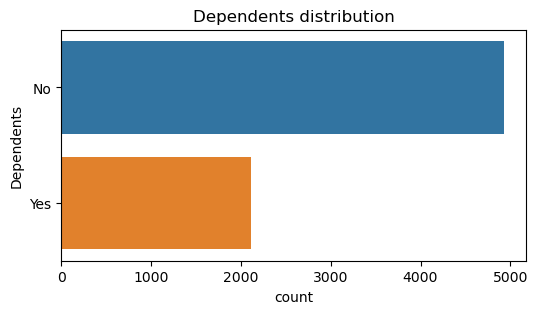

,counts,churn_rate
Yes,6361,0.267096
No,682,0.249267


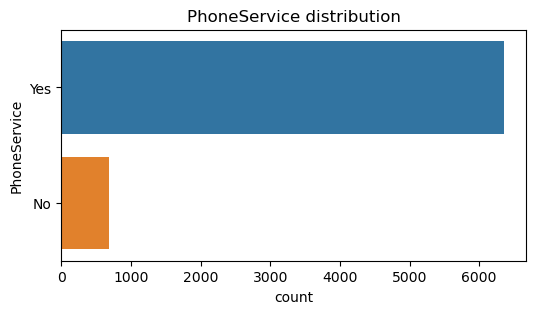

,counts,churn_rate
No,3390,0.250442
Yes,2971,0.286099
No phone service,682,0.249267


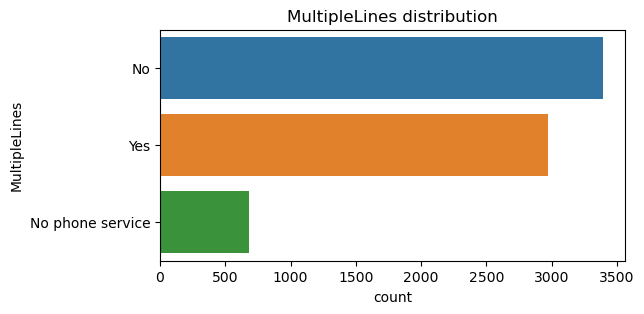

,counts,churn_rate
Fiber optic,3096,0.418928
DSL,2421,0.189591
No,1526,0.074050


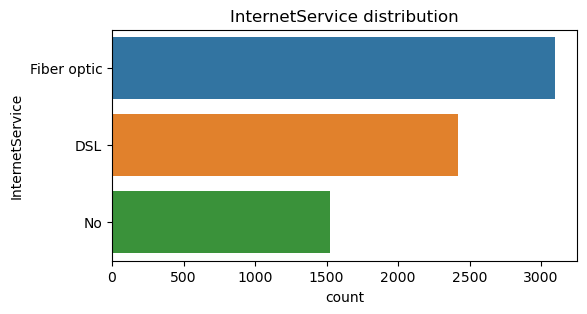

,counts,churn_rate
No,3498,0.417667
Yes,2019,0.146112
No internet service,1526,0.074050


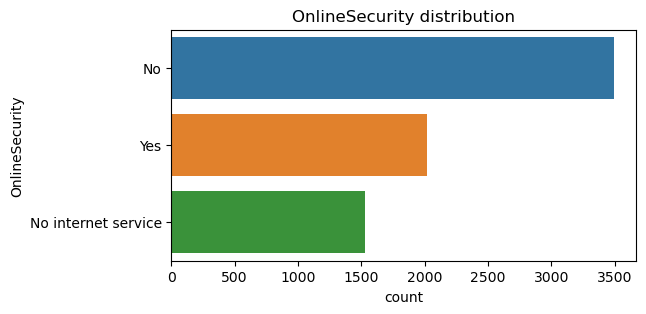

,counts,churn_rate
No,3088,0.399288
Yes,2429,0.215315
No internet service,1526,0.074050


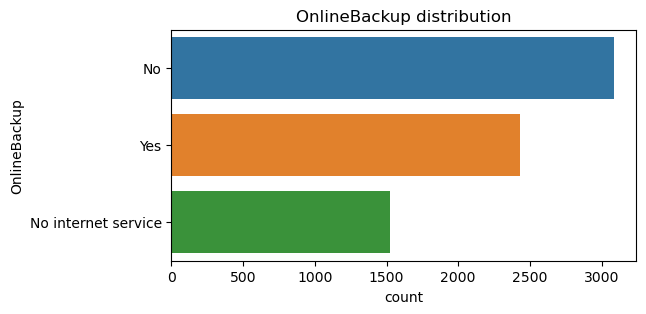

,counts,churn_rate
No,3095,0.391276
Yes,2422,0.225021
No internet service,1526,0.074050


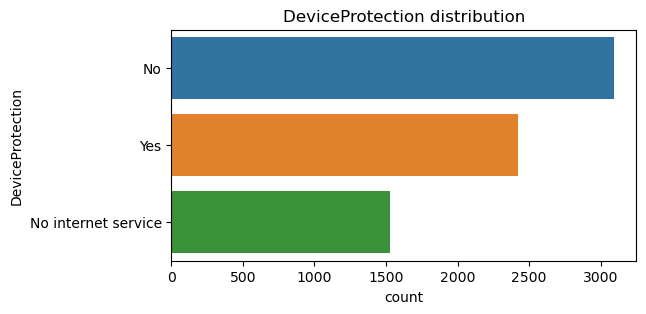

,counts,churn_rate
No,3473,0.416355
Yes,2044,0.151663
No internet service,1526,0.074050


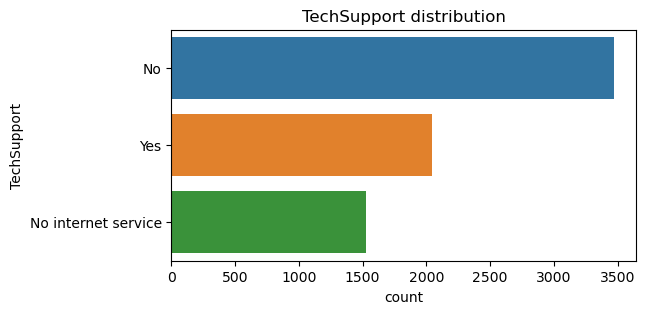

,counts,churn_rate
No,2810,0.335231
Yes,2707,0.300702
No internet service,1526,0.074050


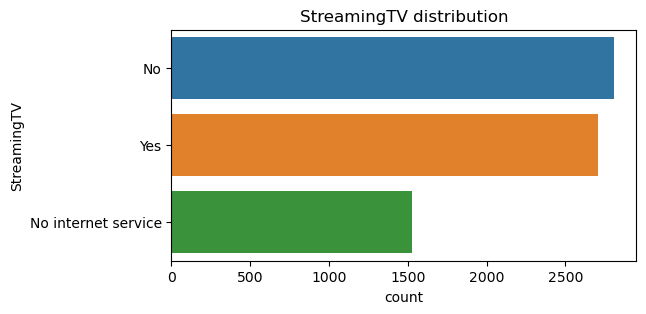

,counts,churn_rate
No,2785,0.336804
Yes,2732,0.299414
No internet service,1526,0.074050


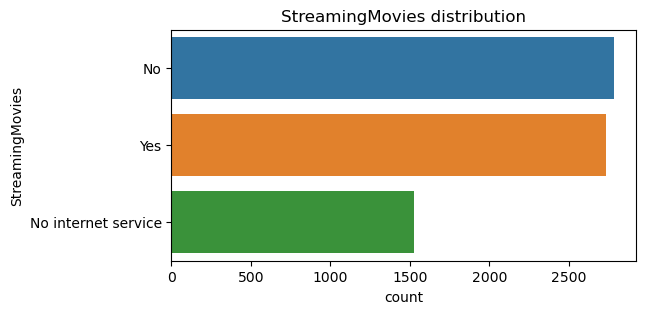

,counts,churn_rate
Month-to-month,3875,0.427097
Two year,1695,0.028319
One year,1473,0.112695


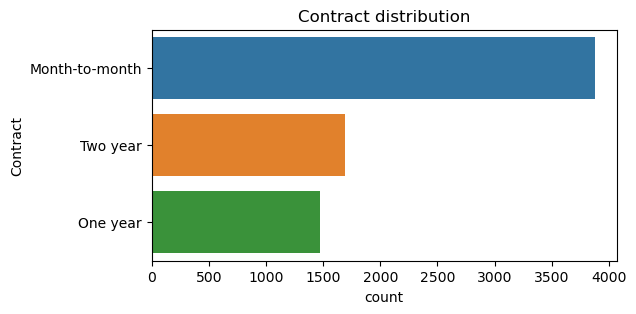

,counts,churn_rate
Yes,4171,0.335651
No,2872,0.163301


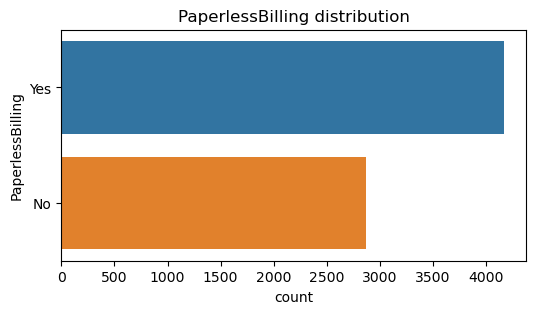

,counts,churn_rate
Electronic check,2365,0.452854
Mailed check,1612,0.191067
Bank transfer (automatic),1544,0.167098
Credit card (automatic),1522,0.152431


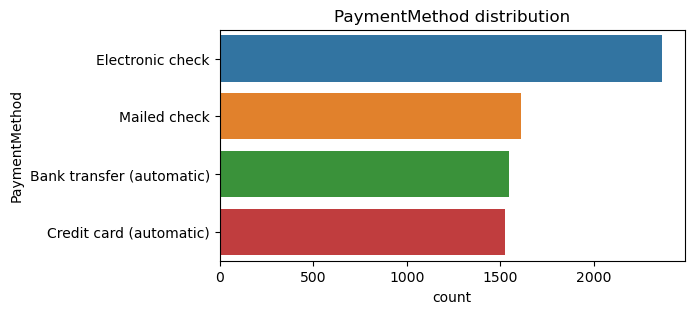

In [22]:
### Categorical features: frequency and churn rate

cat_cols = df.select_dtypes(include='object').drop(columns=['customerID','Churn'], errors='ignore').columns
for col in cat_cols:
    counts = df[col].value_counts()
    if counts.shape[0] <= 30:
        display(pd.DataFrame({
            'counts': counts,
            'churn_rate': df.groupby(col)['Churn'].apply(lambda x: (x=='Yes').mean())
        }).sort_values('counts', ascending=False))
        plt.figure(figsize=(6,3))
        sns.countplot(y=col, data=df, order=counts.index)
        plt.title(f"{col} distribution")
        plt.show()
    else:
        # just display top categories
        display(counts.head(10))


**Categorical Features — Summary**

- For each categorical column (limited cardinality) shows value counts and churn rate.
- Use these results to decide encoding strategies: one-hot for low-cardinality, target encoding or grouping for high-cardinality.
- Action items: list top categories to combine or encode and note any columns with strong churn differences.

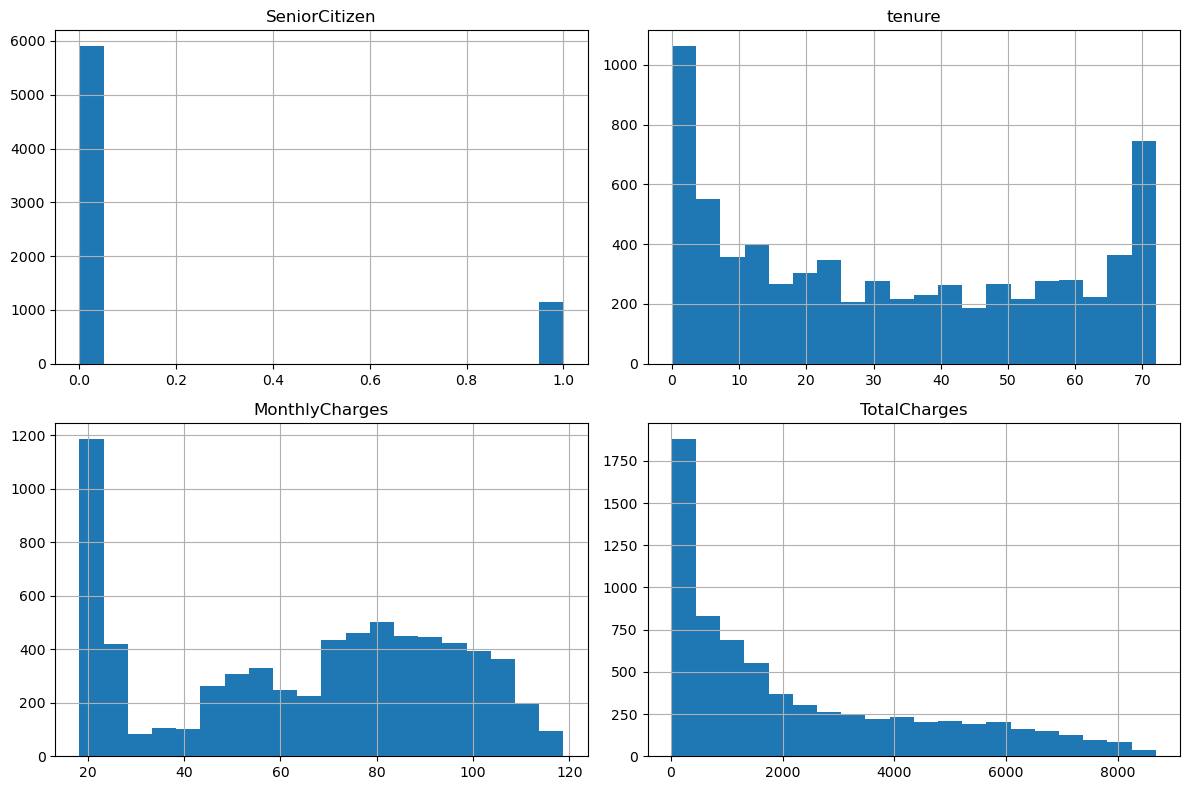

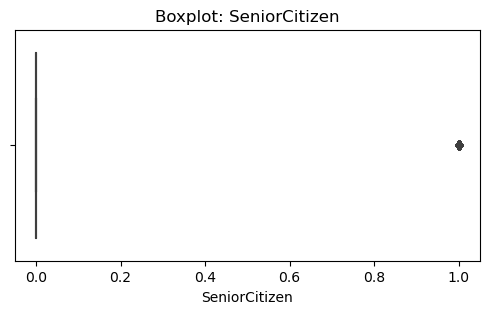

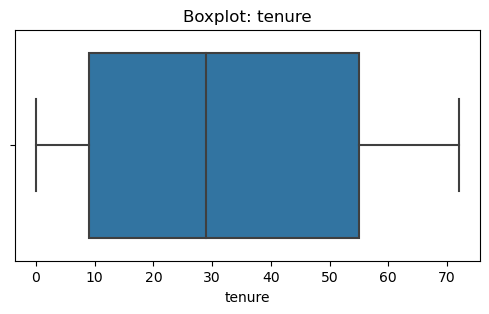

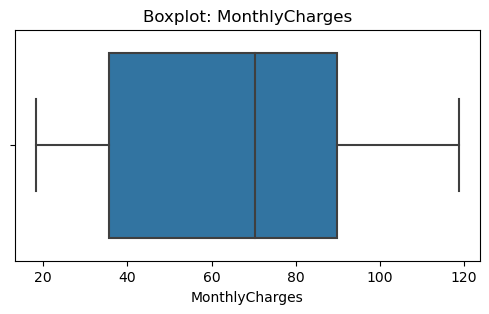

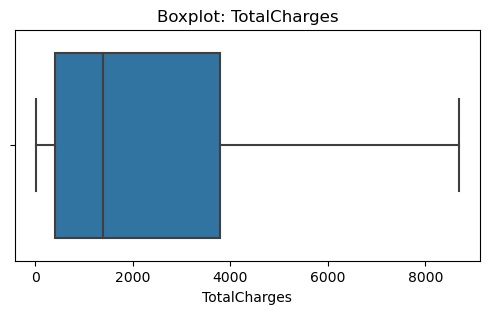

In [23]:
### Numeric distributions and outliers

num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
if len(num_cols) > 0:
    df[num_cols].hist(figsize=(12, 8), bins=20)
    plt.tight_layout()
    plt.show()

    for c in num_cols:
        plt.figure(figsize=(6,3))
        sns.boxplot(x=df[c])
        plt.title(f"Boxplot: {c}")
        plt.show()
else:
    print('No numeric columns found')


**Numeric Distributions & Outliers — Summary**

- Shows histograms for numeric columns and boxplots for outlier inspection.
- Identify skewed features and extreme outliers; consider transformations (log, sqrt) or capping.
- Action items: note features with heavy skew or extreme outliers that need handling before modeling.

MonthlyCharges    0.193356
SeniorCitizen     0.150889
TotalCharges     -0.199037
tenure           -0.352229
dtype: float64

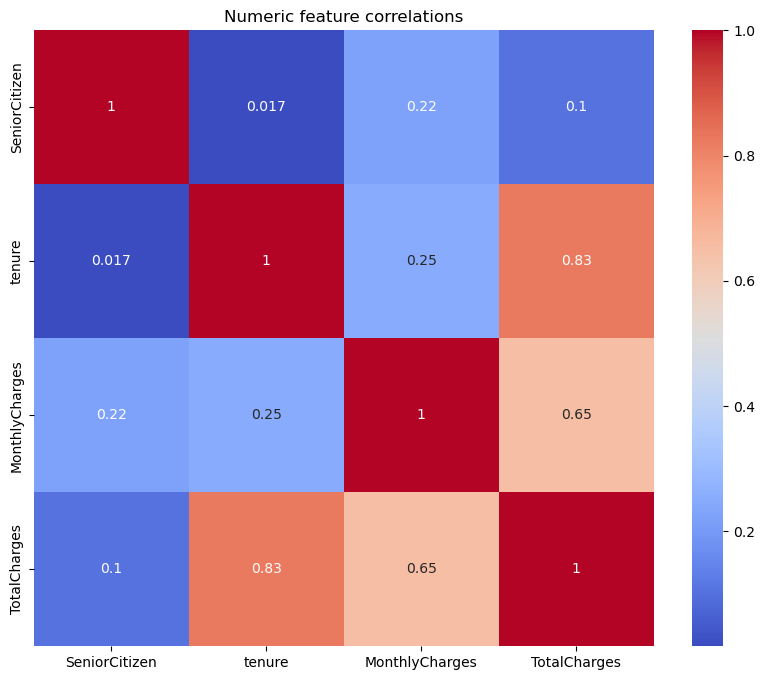

In [24]:
### Correlation with target (point-biserial) and numeric correlations

from scipy.stats import pointbiserialr

if 'Churn' in df.columns:
    y_bin = (df['Churn']=='Yes').astype(int)
    corr_with_target = {}
    for c in num_cols:
        try:
            r, p = pointbiserialr(y_bin.fillna(0), df[c].fillna(df[c].median()))
            corr_with_target[c] = r
        except Exception:
            corr_with_target[c] = None
    corr_df = pd.Series(corr_with_target).dropna().sort_values(ascending=False)
    display(corr_df)

# numeric correlation heatmap (already present earlier but keep for convenience)
plt.figure(figsize=(10,8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Numeric feature correlations')
plt.show()


**Correlations — Summary**

- Displays point-biserial correlation between numeric features and churn, and a numeric correlation heatmap.
- Use this to identify top predictors and multicollinearity issues.
- Action items: list top positively and negatively correlated numeric features; consider removing/reducing correlated pairs.

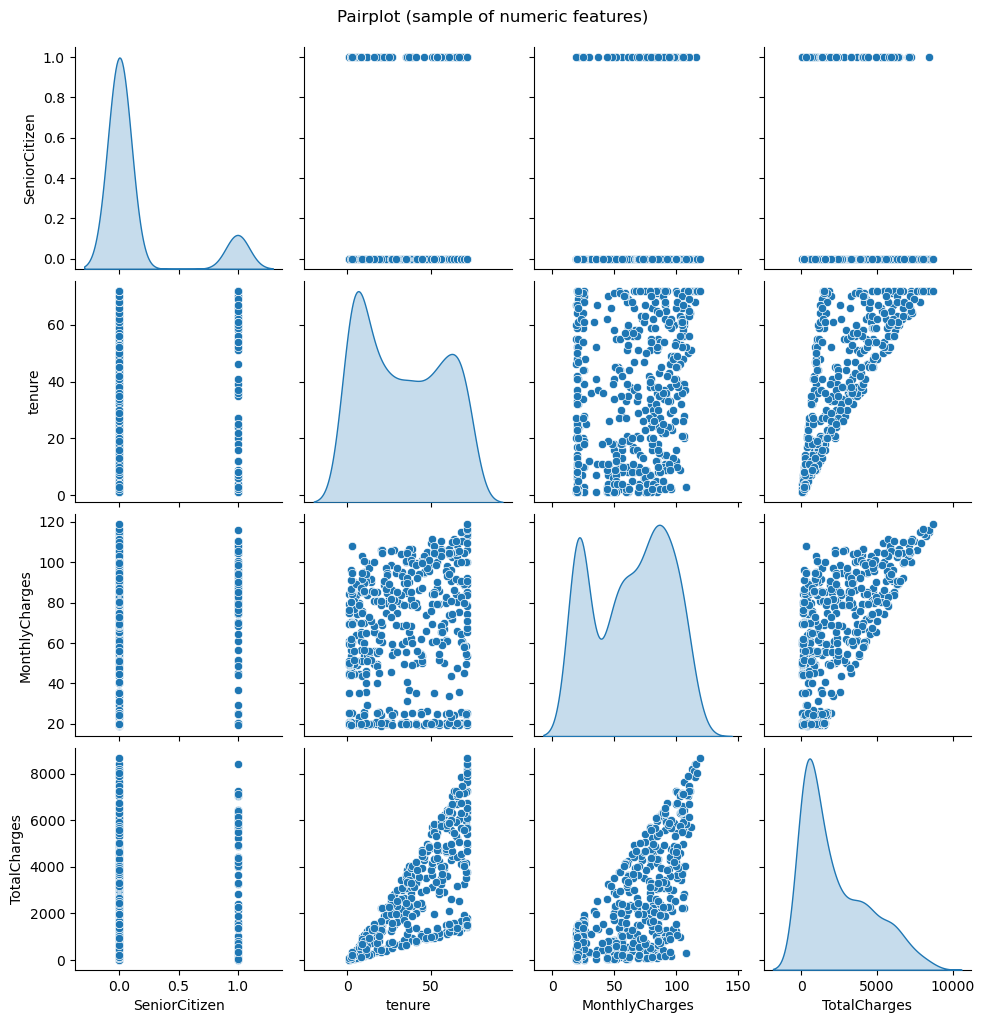

In [25]:
### Pairplot (sample)

try:
    sample_size = min(500, len(df))
    sns.pairplot(df.select_dtypes(include=['int64','float64']).sample(sample_size), diag_kind='kde')
    plt.suptitle('Pairplot (sample of numeric features)', y=1.02)
    plt.show()
except Exception as e:
    print('Pairplot skipped:', e)


**Pairplot — Summary**

- Pairplot shows relationships and distributions for numeric features (sampled to limit size).
- Useful to visually inspect separation between churn classes and spot strong pairwise relationships.
- Action items: if strong separation is visible in any pairs, consider interactions or feature combinations.

In [26]:
### Class balance

if 'Churn' in df.columns:
    counts = df['Churn'].value_counts()
    pct = counts / counts.sum() * 100
    display(pd.DataFrame({'counts': counts, 'percent': pct.round(2)}))


,counts,percent
No,5174,73.46
Yes,1869,26.54


**Class Balance — Summary**

- Shows counts and percentages for the `Churn` classes.
- If classes are imbalanced, consider stratified cross-validation, class-weighted models, or resampling techniques (SMOTE/undersampling).
- Action items: record class ratio and choose sampling strategy for modeling.

In [7]:
### Save processed dataset

processed_path = 'data/processed/processed.csv'
try:
    df.to_csv(processed_path, index=False)
    print('Saved processed dataset to', processed_path)
except Exception as e:
    print('Could not save processed dataset:', e)


Could not save processed dataset: name 'df' is not defined


**Save Processed Dataset — Summary**

- Saves the cleaned `df` to `data/processed/processed.csv` for reproducibility and downstream modeling.
- Verify the saved file contains expected cleaned/encoded columns and no unintended temporary columns.
- Action items: check the file and commit it (do not add large raw datasets to git).